http://cv-tricks.com/tensorflow-tutorial/understanding-alexnet-resnet-squeezenetand-running-on-tensorflow/

In [1]:
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
naosei = cv.imread('../bagunca/DeepLearning-DataScience/data/esperanca.png', 0)

In [3]:
%matplotlib inline
# plt.imshow(naosei)

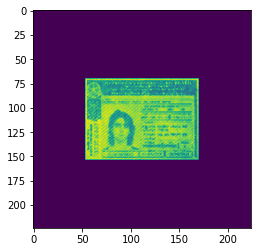

In [4]:
def img_pad(img, downscale):
    downscale = 10+int(8*downscale)
    dimensions = (int(img.shape[1]/downscale), int(img.shape[0]/downscale))
    img_ = cv.resize(img, dimensions)
    pad_to_224_x = int((224 - img_.shape[0])/2)
    pad_to_224_y = int((224 - img_.shape[1])/2)
    img_ = np.pad(img_, ((pad_to_224_x, pad_to_224_x), (pad_to_224_y, pad_to_224_y)), 'constant', constant_values=(0, 0))
    img_ = cv.resize(img_, (224,224))
    return img_
modacaralha = img_pad(naosei, random.random())
plt.imshow(modacaralha)

0.8070969586544269


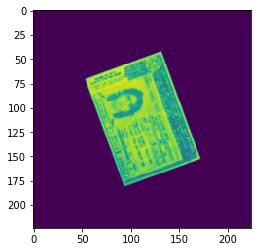

In [5]:
def img_rotate(img, angle):
    num_rows, num_cols = img.shape[:2]
    rotation_matrix = cv.getRotationMatrix2D((num_cols/2, num_rows/2), int(angle*360), 1)
    img_rotation = cv.warpAffine(img, rotation_matrix, (num_cols, num_rows))
    return img_rotation
c = random.random()
modacaralha = img_rotate(modacaralha, c)
plt.imshow(modacaralha)
print(c)

0.8812481343738617 0.3227928738986373


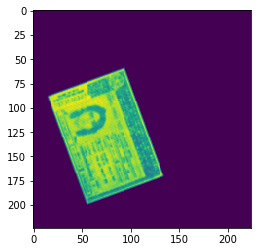

In [6]:
def img_translate(img, a, b):
    rows,cols = img.shape
    M = np.float32([[1,0, 50 - a*100],[0,1, 50 - b*100]])
    img_ = cv.warpAffine(img,M,(cols,rows))
    return img_
a, b = random.random(), random.random()
modacaralha = img_translate(modacaralha, a, b)
plt.imshow(modacaralha)
print(a, b)

In [7]:
def create_batch(img, size):
    batch_x, batch_y = [], []
    for i in range(size):
        img_padded = img_pad(img, random.random())
        rotation_val = random.random()
        translate_a = random.random()
        translate_b = random.random()
        rotated_img = img_rotate(img_padded, rotation_val)
        translated_img = img_translate(rotated_img, translate_a, translate_b)
        batch_x.append(translated_img.ravel())
        batch_y.append([translate_a, translate_b])
    return batch_x, batch_y

In [8]:
from tensorflow.contrib import slim

In [9]:
COLOR_CHANNELS = 1
data_ph = tf.placeholder(tf.float32, shape=[None, COLOR_CHANNELS*224**2])
output_ph = tf.placeholder(tf.float32, shape=[None, 2])
learning_rate = tf.placeholder('float', [])

In [10]:
def alexNet_convolutions(x_image):
    hl = tf.layers.batch_normalization(slim.conv2d(x_image, 32, [11,11], stride=4))
    print(hl.shape)
    hl = slim.max_pool2d(hl, [3,3], stride=2)
    print(hl.shape)
    hl = tf.layers.batch_normalization(slim.conv2d(hl, 86, [5,5]))
    print(hl.shape)
    hl = slim.max_pool2d(hl, [3,3], stride=2)
    print(hl.shape)
    hl = tf.layers.batch_normalization(slim.conv2d(hl, 128, [3, 3]))
    print(hl.shape)
    hl = tf.layers.batch_normalization(slim.conv2d(hl, 128, [3, 3]))
    print(hl.shape)
    hl = tf.layers.batch_normalization(slim.conv2d(hl, 86, [3, 3]))
    print(hl.shape)
    hl = slim.max_pool2d(hl, [3,3], stride=2)
    print(hl.shape)
    
    return hl

In [11]:
x_image = tf.reshape(tf.layers.batch_normalization(data_ph), [-1, 224, 224, COLOR_CHANNELS])
hl = alexNet_convolutions(x_image)
hl = slim.flatten(tf.sigmoid(hl))
print(hl.shape)

(?, 56, 56, 32)
(?, 27, 27, 32)
(?, 27, 27, 86)
(?, 13, 13, 86)
(?, 13, 13, 128)
(?, 13, 13, 128)
(?, 13, 13, 86)
(?, 6, 6, 86)
(?, 3096)


In [12]:
fc = slim.stack(hl, slim.fully_connected, [3096, 1569, 564, 84, 2])
print(fc.shape)

(?, 2)


In [13]:
loss = tf.reduce_mean((fc - output_ph)**2)
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [14]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

<IPython.core.display.Javascript object>


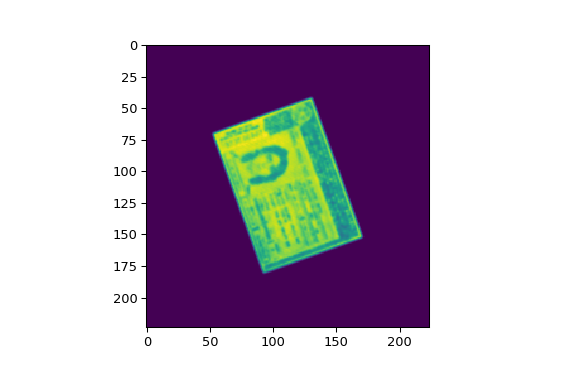

0
0.0136346
[[ 0.69132656  0.40211141]]
100
0.00494425
[[ 0.91510433  0.29172704]]
200
0.015153
[[ 0.90234524  0.28151634]]
300
0.00441739
[[ 0.8547824   0.31945023]]
400
0.00072517
[[ 0.94990224  0.37033126]]
500
0.000718223
[[ 0.90968484  0.33932525]]
600
0.00583336
[[ 0.92306465  0.33087504]]
700
0.00322721
[[ 0.92504948  0.36945513]]
800
0.00286765
[[ 0.96275502  0.31949133]]
900
0.000753286
[[ 0.92715561  0.38089406]]
1000
0.00287401
[[ 0.87785912  0.38552389]]
1100
0.00169608
[[ 0.87038124  0.32331315]]
1200
0.00269472
[[ 0.93748379  0.27263314]]
1300
0.00140447
[[ 0.86678499  0.31671149]]
1400
0.00122987
[[ 0.87811464  0.38905886]]
1500
0.00141209
[[ 0.93420178  0.36009228]]
1600
0.00228652
[[ 0.89924937  0.37971824]]
1700
0.00158689
[[ 0.83824152  0.35842493]]
1800
0.00181754
[[ 0.91990536  0.35369122]]
1900
0.00102554
[[ 0.90855742  0.37972146]]
2000
0.0021772
[[ 0.91412175  0.37982917]]
2100
0.0049431
[[ 0.93240446  0.33870801]]
2200
0.00215272
[[ 0.86155105  0.32807413]]
230

18300
0.000188206
[[ 0.88770318  0.3330282 ]]
18400
0.00047369
[[ 0.93260813  0.34396416]]
18500
0.000879376
[[ 0.9032656   0.30168098]]
18600
0.000181462
[[ 0.88402557  0.33626118]]
18700
0.000139721
[[ 0.89535511  0.3287673 ]]
18800
6.44779e-05
[[ 0.90978795  0.33103579]]
18900
0.000169519
[[ 0.90235078  0.30191189]]
19000
0.000381439
[[ 0.90064156  0.34472036]]
19100
0.000931239
[[ 0.85702288  0.33711696]]
19200
0.000327166
[[ 0.89275187  0.37073594]]
19300
0.000332037
[[ 0.89594543  0.31444824]]
19400
0.000497709
[[ 0.89392805  0.30672196]]
19500
0.00106214
[[ 0.9239518   0.34520701]]
19600
0.000277023
[[ 0.88446766  0.35240942]]
19700
0.000701563
[[ 0.8667798  0.3351011]]
19800
0.000293222
[[ 0.88334572  0.31419268]]
19900
0.000505616
[[ 0.9085803   0.36497715]]
20000
0.00018936
[[ 0.89309245  0.32521856]]
20100
0.00100649
[[ 0.92858922  0.29696566]]
20200
0.000617679
[[ 0.89215964  0.35888106]]
20300
0.0011376
[[ 0.8281669   0.33041841]]
20400
0.000210675
[[ 0.89221555  0.3298382

36200
0.000110329
[[ 0.86760706  0.32361779]]
36300
0.000248871
[[ 0.86970365  0.32145044]]
36400
9.80052e-05
[[ 0.88898081  0.32813329]]
36500
0.00025034
[[ 0.87432086  0.32081729]]
36600
0.000255755
[[ 0.86653495  0.34778497]]
36700
0.000130963
[[ 0.88564211  0.32633013]]
36800
0.000168551
[[ 0.88020331  0.3279753 ]]
36900
7.40502e-05
[[ 0.88297099  0.32707343]]
37000
0.000241082
[[ 0.90711862  0.33535188]]
37100
0.000293672
[[ 0.89521426  0.30634186]]
37200
0.000790227
[[ 0.85599881  0.29714331]]
37300
0.000323787
[[ 0.9024815   0.31858921]]
37400
0.000273398
[[ 0.91579723  0.31639057]]
37500
8.0507e-05
[[ 0.89361918  0.30799356]]
37600
0.00027745
[[ 0.89675307  0.33539951]]
37700
9.41955e-05
[[ 0.8882513   0.32128653]]
37800
0.000174766
[[ 0.89892864  0.30727398]]
37900
8.28906e-05
[[ 0.86388487  0.32206136]]
38000
0.000448978
[[ 0.88024485  0.31091583]]
38100
0.000264221
[[ 0.88165683  0.29684749]]
38200
0.000658631
[[ 0.87289906  0.29165447]]
38300
0.000120626
[[ 0.87229013  0.31

54100
0.000191451
[[ 0.87962896  0.31475419]]
54200
0.000152521
[[ 0.88373786  0.32331848]]
54300
5.34194e-05
[[ 0.87805068  0.3221789 ]]
54400
0.000141579
[[ 0.88456422  0.31924161]]
54500
0.000472322
[[ 0.8573004   0.32974929]]
54600
0.000101626
[[ 0.89157748  0.34126019]]
54700
6.01531e-05
[[ 0.88609123  0.32996956]]
54800
0.00027335
[[ 0.89852756  0.31414533]]
54900
0.000136695
[[ 0.87182862  0.32536295]]
55000
0.000316391
[[ 0.89602071  0.32235363]]
55100
0.000119643
[[ 0.90262747  0.33723742]]
55200
0.000163809
[[ 0.89550811  0.31320596]]
55300
6.0681e-05
[[ 0.88777351  0.32008025]]
55400
1.44409e-05
[[ 0.88437408  0.32389987]]
55500
0.000161579
[[ 0.86955363  0.32136825]]
55600
7.22636e-05
[[ 0.8802833   0.31013757]]
55700
9.64344e-05
[[ 0.88269961  0.32473502]]
55800
4.85157e-05
[[ 0.87400228  0.3296507 ]]
55900
0.000269186
[[ 0.8705855  0.3408809]]
56000
0.000255736
[[ 0.85924935  0.31389657]]
56100
9.91046e-05
[[ 0.85965723  0.32567066]]
56200
6.49e-05
[[ 0.87253588  0.329539

72000
0.00011488
[[ 0.86954314  0.31519309]]
72100
2.74202e-05
[[ 0.88004464  0.32607558]]
72200
0.000138182
[[ 0.88788772  0.32649368]]
72300
0.000309661
[[ 0.8747583   0.32169554]]
72400
6.70008e-05
[[ 0.88870895  0.32727584]]
72500
4.01849e-05
[[ 0.87642896  0.33841044]]
72600
5.06561e-05
[[ 0.8676995   0.32707086]]
72700
8.24401e-05
[[ 0.8647936   0.31323656]]
72800
0.00011285
[[ 0.88719451  0.32607451]]
72900
9.51922e-05
[[ 0.87897128  0.33640975]]
73000
5.8836e-05
[[ 0.875848  0.315887]]
73100
2.22945e-05
[[ 0.88457173  0.32391748]]
73200
4.45125e-05
[[ 0.88050866  0.30457199]]
73300
5.94781e-05
[[ 0.86410642  0.31965321]]
73400
0.000144033
[[ 0.86835551  0.31814593]]
73500
0.000246266
[[ 0.86841929  0.33042598]]
73600
0.000120056
[[ 0.86830974  0.34019595]]
73700
0.000114876
[[ 0.88342017  0.32915729]]
73800
7.91959e-05
[[ 0.86309862  0.32292697]]
73900
0.000219207
[[ 0.90667176  0.33047369]]
74000
5.48555e-05
[[ 0.87878877  0.32185721]]
74100
0.00020798
[[ 0.8729865   0.3338467

89900
5.59159e-05
[[ 0.86883193  0.32154158]]
90000
0.000131781
[[ 0.86150759  0.31930497]]
90100
6.27639e-05
[[ 0.86411726  0.33449638]]
90200
7.91734e-05
[[ 0.86846375  0.32411197]]
90300
6.14977e-05
[[ 0.86819232  0.32418352]]
90400
2.43237e-05
[[ 0.87181157  0.32560393]]
90500
7.17099e-05
[[ 0.87103003  0.32003453]]
90600
1.41786e-05
[[ 0.87143332  0.32094857]]
90700
1.61297e-05
[[ 0.8676849   0.32082656]]
90800
4.76363e-05
[[ 0.87235039  0.32040986]]
90900
1.64837e-05
[[ 0.87117153  0.31931311]]
91000
8.87753e-05
[[ 0.8703512   0.32391116]]
91100
1.39785e-05
[[ 0.87082577  0.31715047]]
91200
8.79328e-05
[[ 0.87175345  0.31663924]]
91300
2.35661e-05
[[ 0.87380928  0.32140586]]
91400
2.443e-05
[[ 0.87111652  0.32162356]]
91500
2.34026e-05
[[ 0.87619579  0.31843948]]
91600
5.44397e-05
[[ 0.86801779  0.31900892]]
91700
6.17318e-05
[[ 0.86652631  0.31955716]]
91800
6.22407e-05
[[ 0.87597078  0.32013145]]
91900
2.8158e-05
[[ 0.87039149  0.32252619]]
92000
3.78331e-05
[[ 0.86965984  0.32

In [20]:
%matplotlib notebook
import time

batch_size = 3
steps = 100000
rate = 3e-6

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        batch_x, batch_y = create_batch(naosei, batch_size)
        feed = {data_ph:batch_x, output_ph:batch_y, learning_rate:rate}
        sess.run(train, feed_dict=feed)
        
        if i%100 == 0:
            if i>90000:
                rate = 3e-7
            if i>95000:
                rate = 3e-8
            last_loss = sess.run(loss, feed_dict = feed)
            print(i)
            print(last_loss)
            pred = sess.run(fc, feed_dict={data_ph:[modacaralha.ravel()]})
            print(pred)
            ax.clear()
            ax.imshow(img_translate(modacaralha, 1-pred[0][0], 1-pred[0][1]))
            fig.canvas.draw()
            test_batch, _ = create_batch(naosei, 10)
            final_pred = sess.run(fc, feed_dict={data_ph:test_batch})
    location = "./saved_models/center/center.ckpt"
    save_path = saver.save(sess, location)
    print("model saved in ", location)

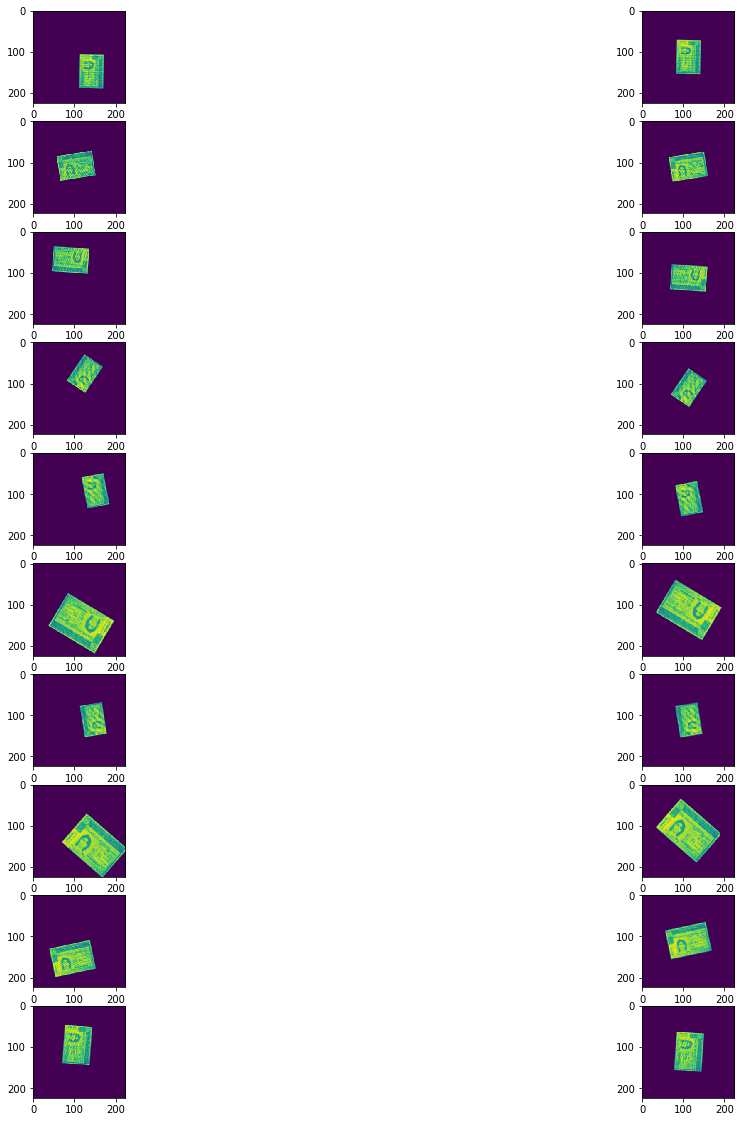

In [21]:
%matplotlib inline
plots = []
fig = plt.figure(figsize=(20,20))
__=0
for i in range(len(final_pred)):
    plots.append(fig.add_subplot(10, 2, __+1))
    plots[__].imshow(test_batch[i].reshape(224,224))
    plots.append(fig.add_subplot(10, 2, __+2))
    plots[__+1].imshow(img_translate(test_batch[i].reshape(224, 224), 1-final_pred[i][0], 1-final_pred[i][1]))
    __ += 2
    